# House Prices - Analysis in Depth

## Follow step-by-step tutorial found in https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
dados = pd.read_csv('train.csv')

In [3]:
dados.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
dados.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
dados.drop('Id', axis=1, inplace=True)

### Analysis of dependent variable, SalePrice, that contains the price of the house

In [6]:
dados['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

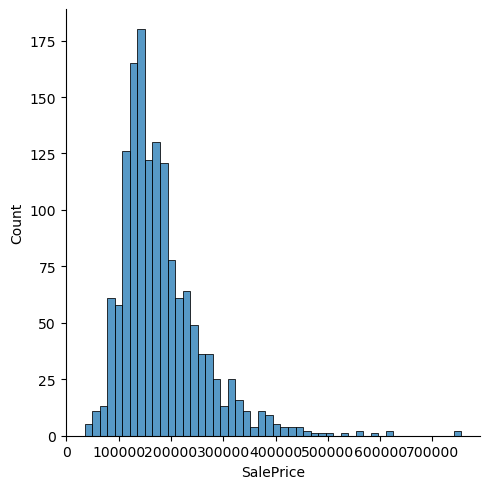

In [7]:
sns.displot(dados['SalePrice'], bins=50)

### According to the author, it deviates from normal distribution, have appreciable positive skewness and show peakedness. I'm not familiar with the concept of peakedness.

Can I show how?

In [8]:
dados['SalePrice'].mean()

180921.19589041095

In [9]:
dados['SalePrice'].median()

163000.0

In [10]:
dados['SalePrice'].mode()

0    140000
Name: SalePrice, dtype: int64

Para uma distribuição ser considerada simétrica, lembre-se que a média, mediana e moda precisam ser iguais. Portanto não é uma distribuição simétrica!

Para uma distribuição ter "positive skewness", a cauda à direita precisa ser mais alongada que a cauda à esquerda. Neste caso, tem-se que a Média > Mediana > Moda, tal como observado por esses valores, bem como a forma da distribuição.

As medidas de curtose também podem ser utilizadas para caracterizar a forma da distribuição da variável em estudo.

- Se k = 0,263, a curva é mesocúrtica;
- Se k > 0,263, a curva é platicúrtica;
- Se k < 0,263, a curva é leptocúrtica.

In [11]:
print('Skewness: {:.3f}\nKurtosis: {:.3f}'.format(dados['SalePrice'].skew(), dados['SalePrice'].kurt()))

Skewness: 1.883
Kurtosis: 6.536


A curva é platicúrtica: o que o autor do tutorial chama de peakedness.

## Checar scatterplot de variáveis consideradas relevantes na primeira análise

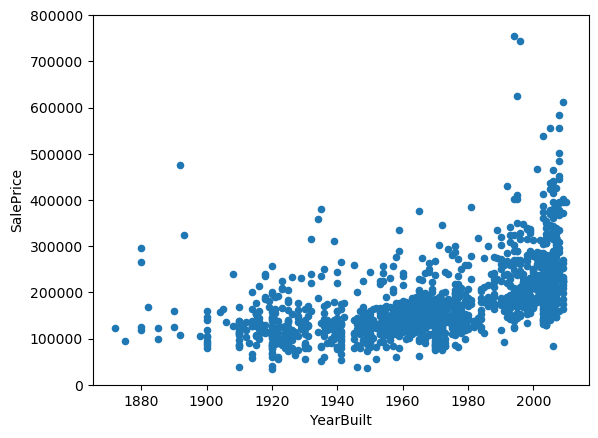

In [12]:
var = 'YearBuilt'
data = pd.concat([dados['SalePrice'], dados[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

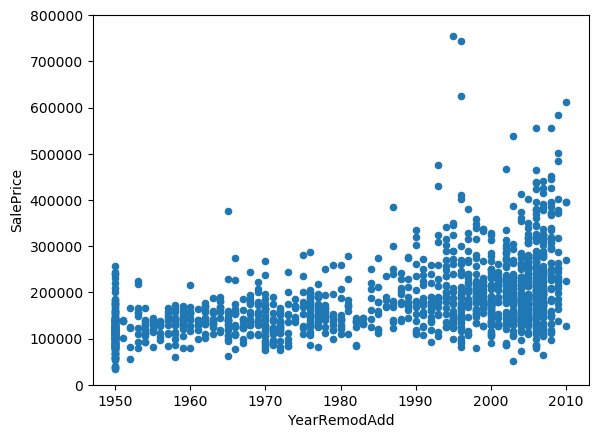

In [13]:
var = 'YearRemodAdd'
data = pd.concat([dados['SalePrice'], dados[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

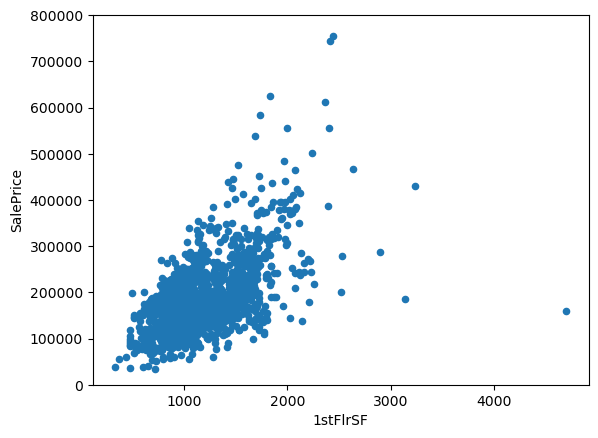

In [14]:
var = '1stFlrSF'
data = pd.concat([dados['SalePrice'], dados[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

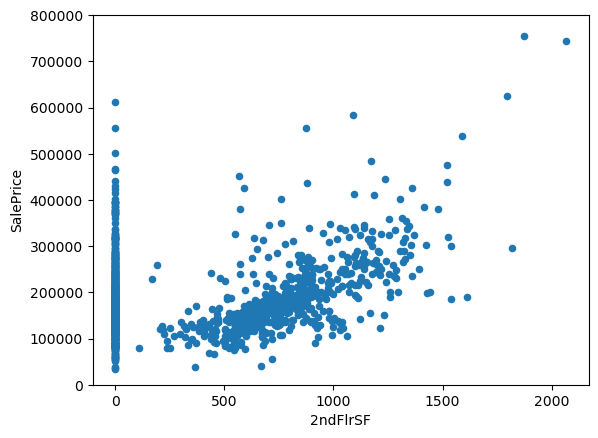

In [15]:
var = '2ndFlrSF'
data = pd.concat([dados['SalePrice'], dados[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

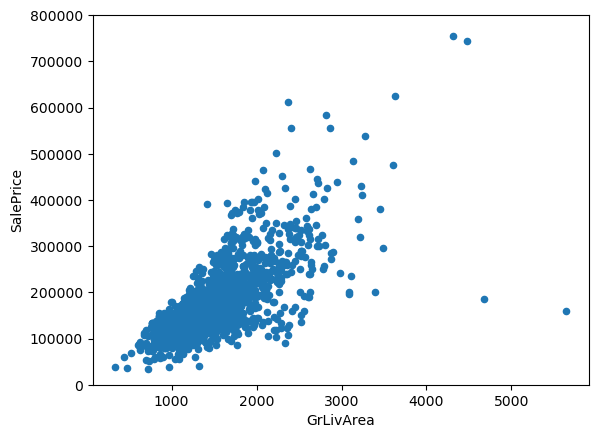

In [16]:
var =  'GrLivArea'
data = pd.concat([dados['SalePrice'], dados[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

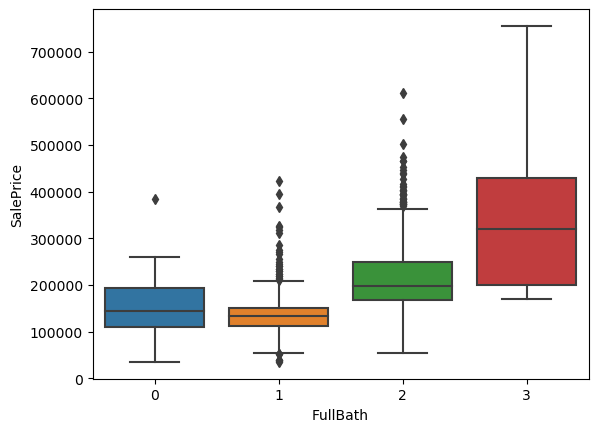

In [17]:
var =  'FullBath'
data = pd.concat([dados['SalePrice'], dados[var]], axis=1)
sns.boxplot(data, x=var, y='SalePrice')

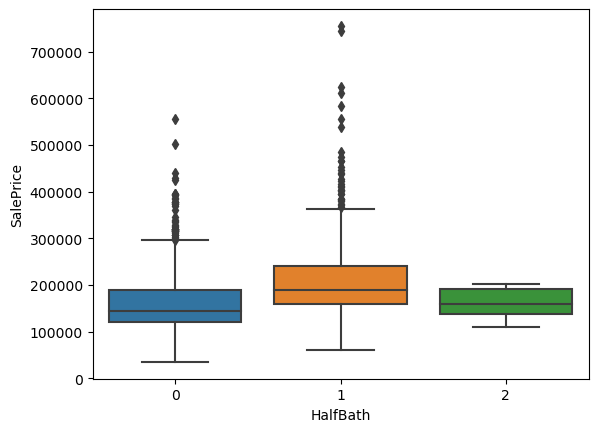

In [18]:
var =  'HalfBath'
data = pd.concat([dados['SalePrice'], dados[var]], axis=1)
sns.boxplot(data, x=var, y='SalePrice')

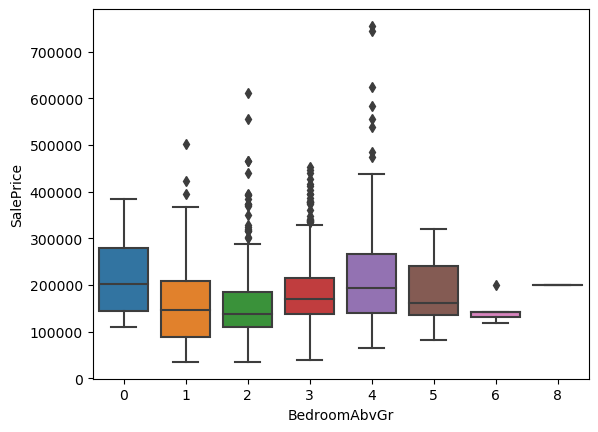

In [19]:
var =   'BedroomAbvGr'
data = pd.concat([dados['SalePrice'], dados[var]], axis=1)
sns.boxplot(data, x=var, y='SalePrice')

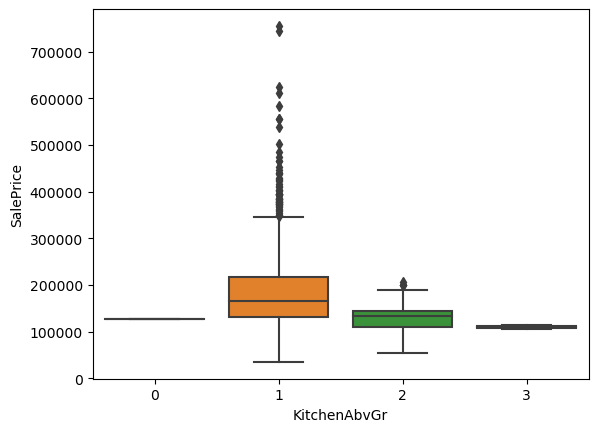

In [20]:
var ='KitchenAbvGr'
data = pd.concat([dados['SalePrice'], dados[var]], axis=1)
sns.boxplot(data, x=var, y='SalePrice')

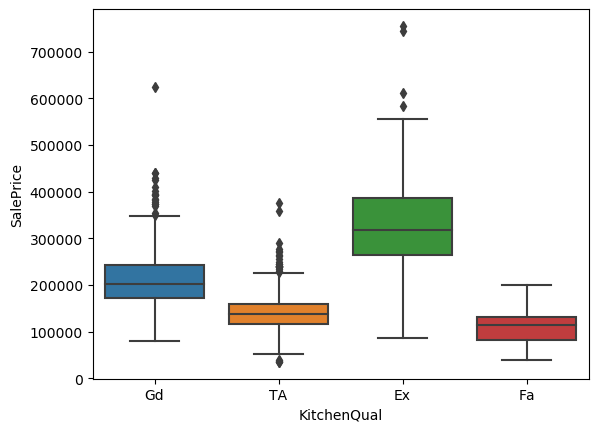

In [21]:
var ='KitchenQual'
data = pd.concat([dados['SalePrice'], dados[var]], axis=1)
sns.boxplot(data, x=var, y='SalePrice')

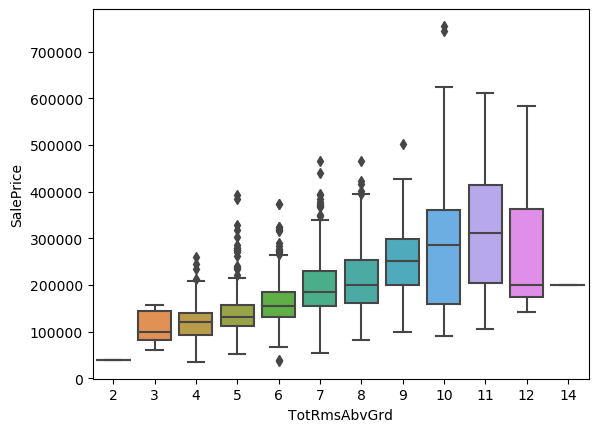

In [22]:
var = 'TotRmsAbvGrd'
data = pd.concat([dados['SalePrice'], dados[var]], axis=1)
sns.boxplot(data, x=var, y='SalePrice')

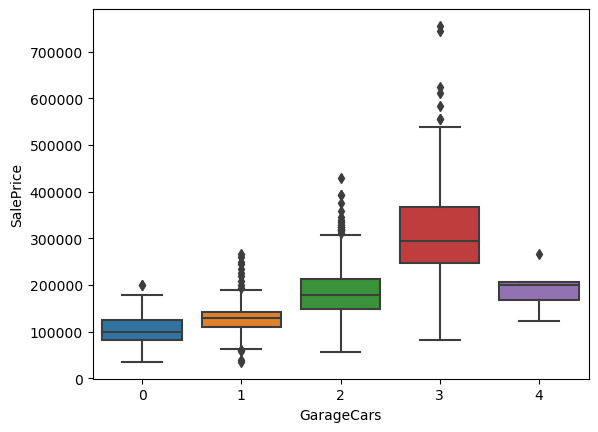

In [23]:
var =  'GarageCars'
data = pd.concat([dados['SalePrice'], dados[var]], axis=1)
sns.boxplot(data, x=var, y='SalePrice')

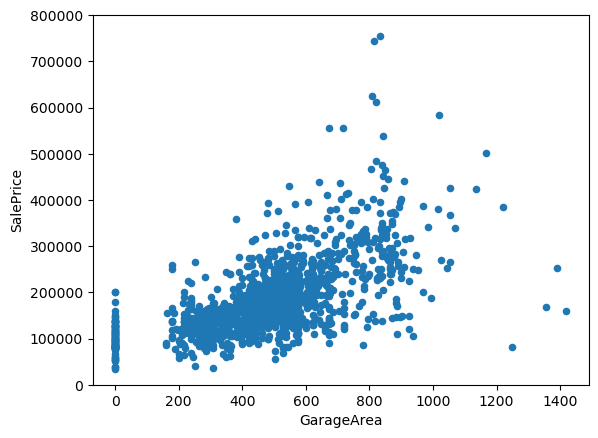

In [24]:
var =  'GarageArea'
data = pd.concat([dados['SalePrice'], dados[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

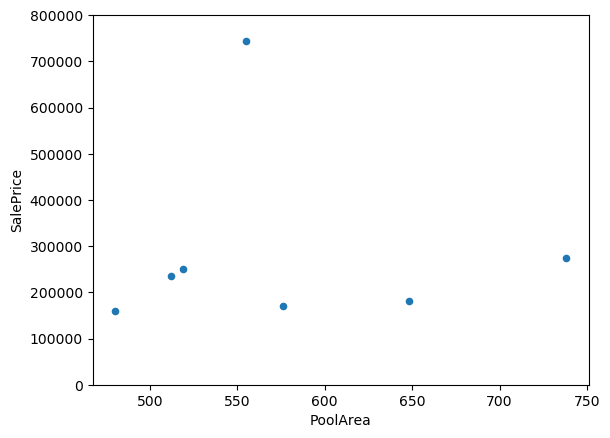

In [25]:
var =  'PoolArea'
data = pd.concat([dados['SalePrice'], dados[var]], axis=1)
data = data[data[var]>0]
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

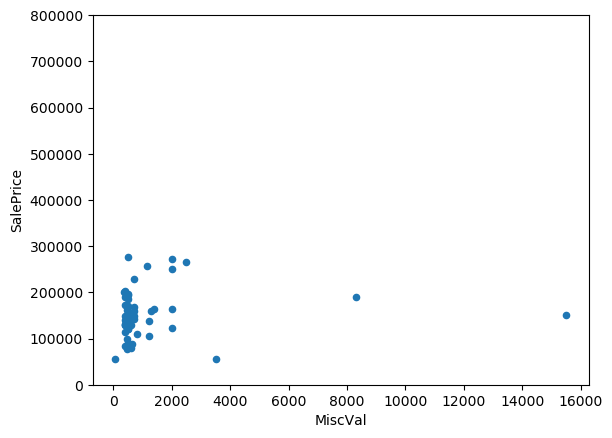

In [26]:
var =  'MiscVal'
data = pd.concat([dados['SalePrice'], dados[var]], axis=1)
data = data[data[var]>0]
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

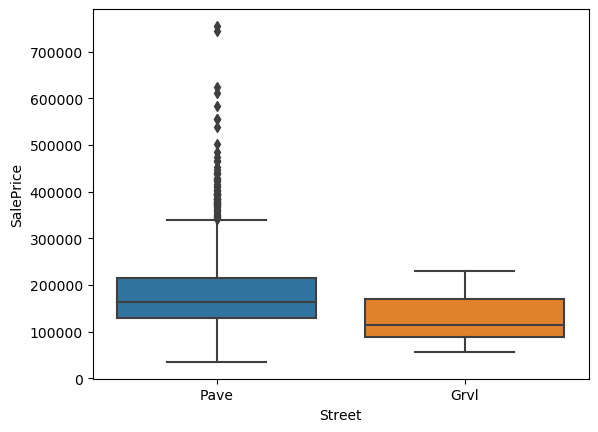

In [27]:
var =  'Street'
data = pd.concat([dados['SalePrice'], dados[var]], axis=1)
sns.boxplot(data, x=var, y='SalePrice')

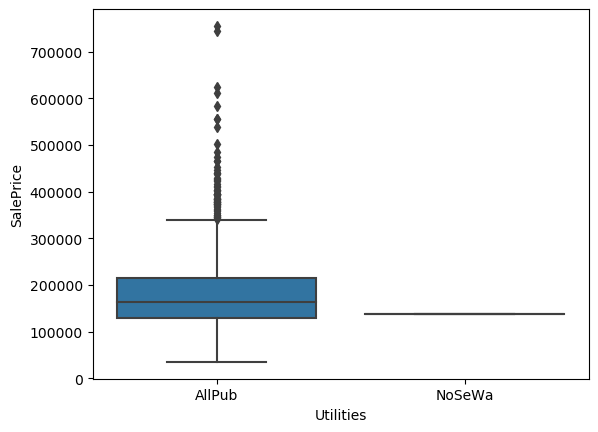

In [28]:
var =  'Utilities'
data = pd.concat([dados['SalePrice'], dados[var]], axis=1)
sns.boxplot(data, x=var, y='SalePrice')

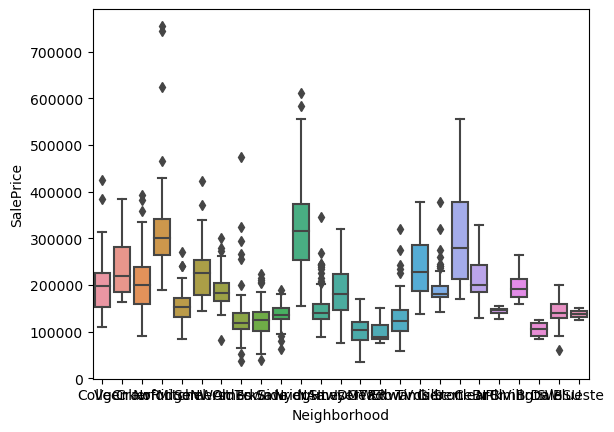

In [29]:
var =   'Neighborhood'
data = pd.concat([dados['SalePrice'], dados[var]], axis=1)
sns.boxplot(data, x=var, y='SalePrice')

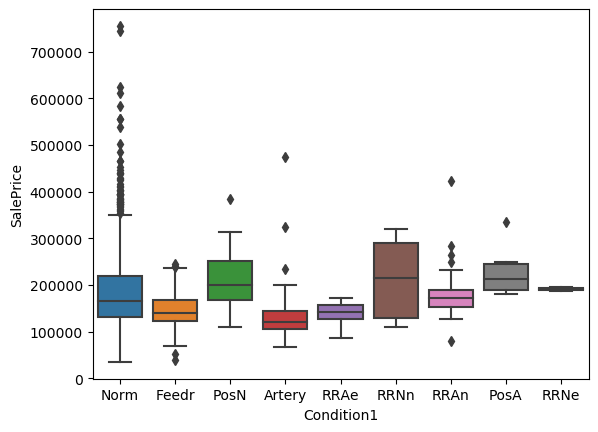

In [30]:
var =   'Condition1'
data = pd.concat([dados['SalePrice'], dados[var]], axis=1)
sns.boxplot(data, x=var, y='SalePrice')

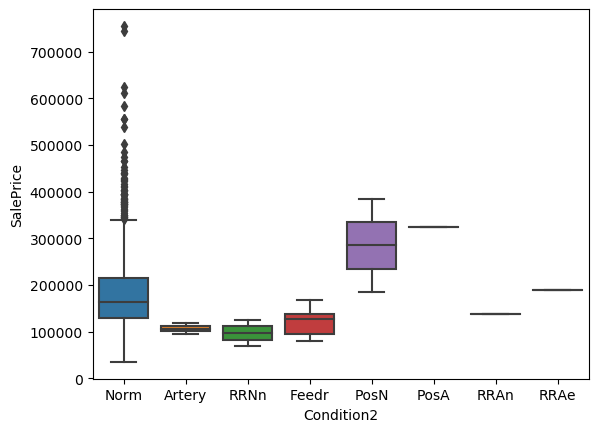

In [31]:
var =   'Condition2'
data = pd.concat([dados['SalePrice'], dados[var]], axis=1)
sns.boxplot(data, x=var, y='SalePrice')

In [32]:
'OverallQual'

'OverallQual'

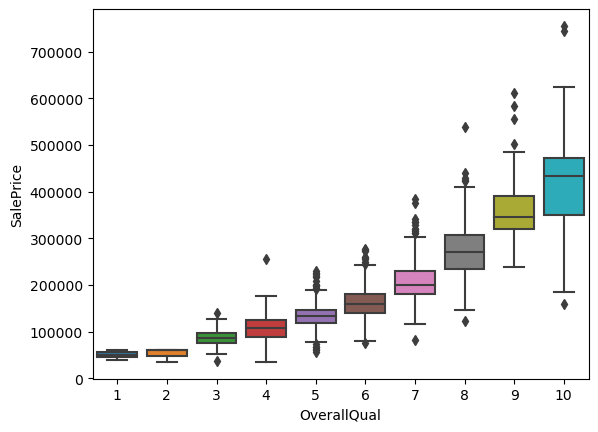

In [33]:
var =   'OverallQual'
data = pd.concat([dados['SalePrice'], dados[var]], axis=1)
sns.boxplot(data, x=var, y='SalePrice')

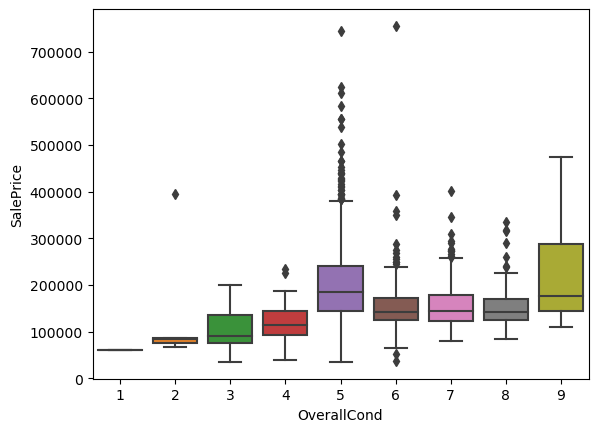

In [34]:
var =    'OverallCond'
data = pd.concat([dados['SalePrice'], dados[var]], axis=1)
sns.boxplot(data, x=var, y='SalePrice')

## Correlation Map

In [35]:
set(dados.dtypes.tolist())

{dtype('int64'), dtype('float64'), dtype('O')}

In [36]:
dados_quantitativos = dados.select_dtypes(include=['float64', 'int64'])

In [37]:
dados_quantitativos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

In [38]:
dados_quantitativos.drop(['MSSubClass','OverallQual','OverallCond'],
                         axis=1,
                        inplace=True)

In [39]:
dados_quantitativos.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1201 non-null   float64
 1   LotArea        1460 non-null   int64  
 2   YearBuilt      1460 non-null   int64  
 3   YearRemodAdd   1460 non-null   int64  
 4   MasVnrArea     1452 non-null   float64
 5   BsmtFinSF1     1460 non-null   int64  
 6   BsmtFinSF2     1460 non-null   int64  
 7   BsmtUnfSF      1460 non-null   int64  
 8   TotalBsmtSF    1460 non-null   int64  
 9   1stFlrSF       1460 non-null   int64  
 10  2ndFlrSF       1460 non-null   int64  
 11  LowQualFinSF   1460 non-null   int64  
 12  GrLivArea      1460 non-null   int64  
 13  BsmtFullBath   1460 non-null   int64  
 14  BsmtHalfBath   1460 non-null   int64  
 15  FullBath       1460 non-null   int64  
 16  HalfBath       1460 non-null   int64  
 17  BedroomAbvGr   1460 non-null   int64  
 18  KitchenA

In [40]:
corrmat = dados_quantitativos.corr()

In [41]:
corrmat

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
LotFrontage,1.000000,0.426095,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,0.426095,1.000000,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
YearBuilt,0.123349,0.014228,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.088866,0.013788,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.193458,0.104160,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,0.233633,0.214103,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,0.049900,0.111170,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378
BsmtUnfSF,0.132644,-0.002618,0.149040,0.181133,0.114442,-0.495251,-0.209294,1.000000,0.415360,0.317987,...,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.214479
TotalBsmtSF,0.392075,0.260833,0.391452,0.291066,0.363936,0.522396,0.104810,0.415360,1.000000,0.819530,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581
1stFlrSF,0.457181,0.299475,0.281986,0.240379,0.344501,0.445863,0.097117,0.317987,0.819530,1.000000,...,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.605852


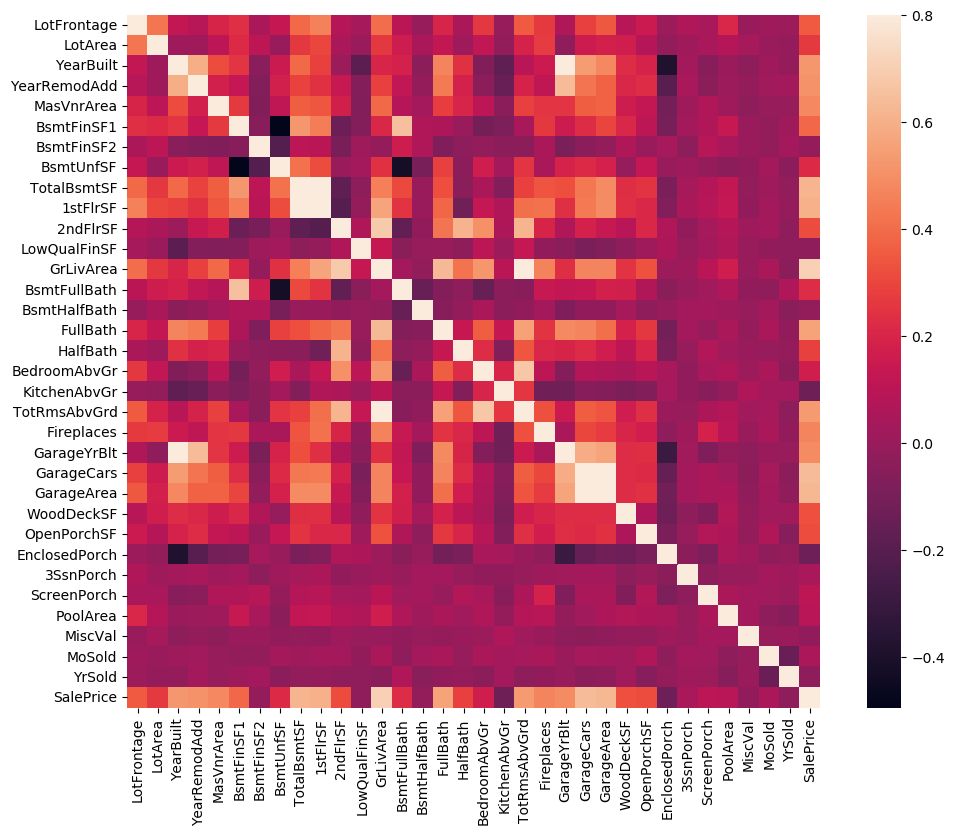

In [42]:
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.8, square=True)

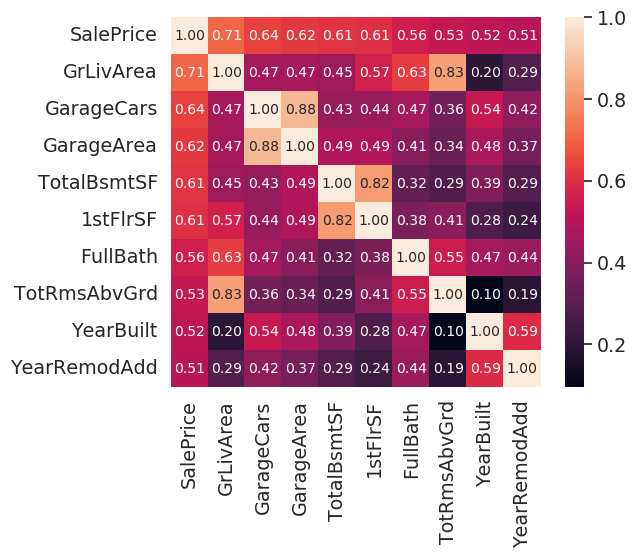

In [43]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(dados_quantitativos[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [44]:
dados_quantitativos['MasVnrArea']

0       196.0
1         0.0
2       162.0
3         0.0
4       350.0
        ...  
1455      0.0
1456    119.0
1457      0.0
1458      0.0
1459      0.0
Name: MasVnrArea, Length: 1460, dtype: float64

In [45]:

pd.crosstab(dados['SalePrice'], dados['OverallQual'])

OverallQual,1,2,3,4,5,6,7,8,9,10
SalePrice,,,,,,,,,,
34900,0,0,0,1,0,0,0,0,0,0
35311,0,1,0,0,0,0,0,0,0,0
37900,0,0,1,0,0,0,0,0,0,0
39300,1,0,0,0,0,0,0,0,0,0
40000,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
582933,0,0,0,0,0,0,0,0,1,0
611657,0,0,0,0,0,0,0,0,1,0
625000,0,0,0,0,0,0,0,0,0,1


In [46]:
nbins = round(1+10/3*np.log10(663))

In [47]:
nbins

10

In [48]:
sale_price_categorical = pd.cut(dados['SalePrice'], bins=nbins, include_lowest=True)   

In [49]:
sale_price_categorical

0       (178920.0, 250930.0]
1       (178920.0, 250930.0]
2       (178920.0, 250930.0]
3       (106910.0, 178920.0]
4       (178920.0, 250930.0]
                ...         
1455    (106910.0, 178920.0]
1456    (178920.0, 250930.0]
1457    (250930.0, 322940.0]
1458    (106910.0, 178920.0]
1459    (106910.0, 178920.0]
Name: SalePrice, Length: 1460, dtype: category
Categories (10, interval[float64, right]): [(34179.899000000005, 106910.0] < (106910.0, 178920.0] < (178920.0, 250930.0] < (250930.0, 322940.0] ... (466960.0, 538970.0] < (538970.0, 610980.0] < (610980.0, 682990.0] < (682990.0, 755000.0]]

In [50]:
pd.crosstab(sale_price_categorical, dados['OverallQual'])

OverallQual,1,2,3,4,5,6,7,8,9,10
SalePrice,,,,,,,,,,
"(34179.899000000005, 106910.0]",2,3,16,53,51,22,1,0,0,0
"(106910.0, 178920.0]",0,0,4,62,323,247,77,9,0,1
"(178920.0, 250930.0]",0,0,0,0,23,99,196,53,1,1
"(250930.0, 322940.0]",0,0,0,1,0,6,39,75,13,1
"(322940.0, 394950.0]",0,0,0,0,0,0,6,22,19,4
"(394950.0, 466960.0]",0,0,0,0,0,0,0,8,5,6
"(466960.0, 538970.0]",0,0,0,0,0,0,0,1,2,1
"(538970.0, 610980.0]",0,0,0,0,0,0,0,0,2,1
"(610980.0, 682990.0]",0,0,0,0,0,0,0,0,1,1


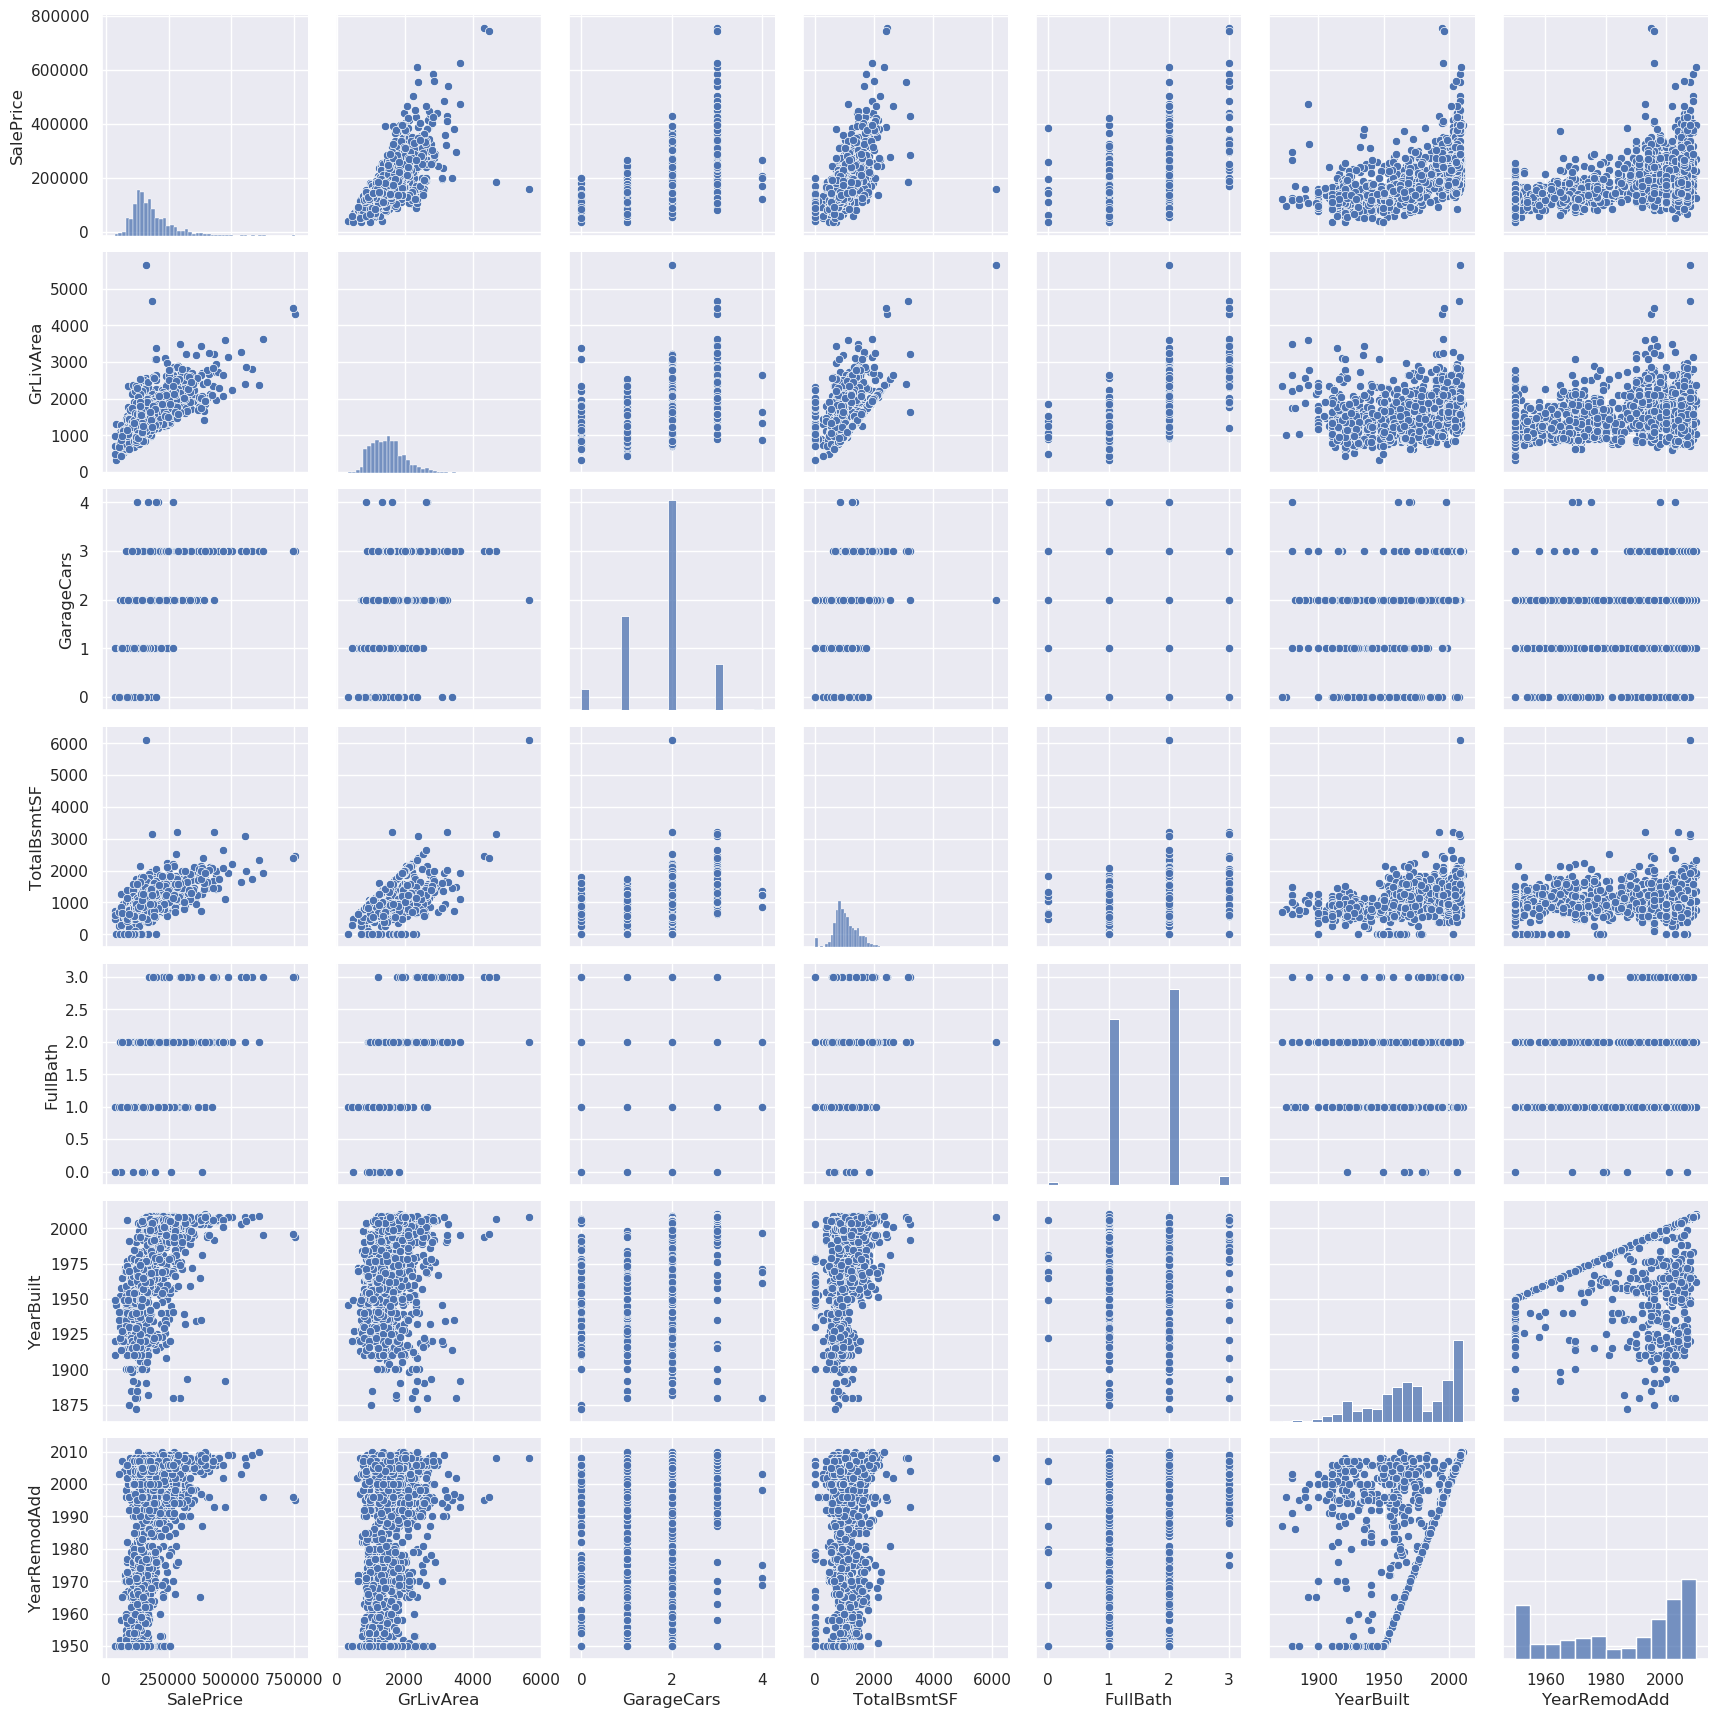

In [51]:
sns.set_theme()
cols = ['SalePrice','GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt', 'YearRemodAdd']
sns.pairplot(dados[cols], size=2.5)
plt.show()

## Missing data

In [52]:
#missing data
total = dados.isnull().sum().sort_values(ascending=False)
percent = (dados.isnull().sum()/dados.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479


In [54]:
dados = dados.drop(missing_data[missing_data['Total'] > 1].index, axis=1)
dados = dados.drop(dados.loc[dados['Electrical'].isnull()].index)
dados.isnull().sum().max()

0

## Outliers

TODO

## Verify behaviour of dependent variable and predictor variables (e.g.: normality, etc.)

todo

## Create dummy variables for the categorical variables

In [55]:
dados['MSSubClass'] = [str(x) for x in dados['MSSubClass']]
dados['OverallQual'] = [str(x) for x in dados['OverallQual']]
dados['OverallCond'] = [str(x) for x in dados['OverallCond']]

## Get model

In [56]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf

2023-07-16 11:57:26.633066: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-16 11:57:26.667346: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-16 11:57:26.667908: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-16 11:57:27.338800: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [57]:
import numpy as np

def split_dataset(dataset, test_ratio=0.30):
    test_indices = np.random.rand(len(dataset)) < test_ratio
    return dataset[~test_indices], dataset[test_indices]

train_ds_pd, test_ds_pd = split_dataset(dados)
print('{} examples in training, {} examples in test'.format(len(train_ds_pd), len(test_ds_pd)))

1017 examples in training, 442 examples in test


In [58]:
label = 'SalePrice'
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label, task=tfdf.keras.Task.REGRESSION)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds_pd, label=label, task=tfdf.keras.Task.REGRESSION)

In [59]:
rf = tfdf.keras.RandomForestModel(hyperparameter_template = 'benchmark_rank1', task = tfdf.keras.Task.REGRESSION)
rf.compile(metrics=['mse'])

Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'winner_take_all': True, 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmpze458twz as temporary training directory


In [60]:
rf.fit(train_ds)

Reading training dataset...
Training dataset read in 0:00:02.952591. Found 1017 examples.
Training model...


[INFO 23-07-16 11:57:40.3656 -03 kernel.cc:1243] Loading model from path /tmp/tmpze458twz/model/ with prefix 8a8b9698ca534b2b
[INFO 23-07-16 11:57:40.5528 -03 decision_forest.cc:660] Model loaded with 300 root(s), 96942 node(s), and 59 input feature(s).
[INFO 23-07-16 11:57:40.5528 -03 abstract_model.cc:1311] Engine "RandomForestGeneric" built
[INFO 23-07-16 11:57:40.5529 -03 kernel.cc:1075] Use fast generic engine


Model trained in 0:00:01.045026
Compiling model...
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.


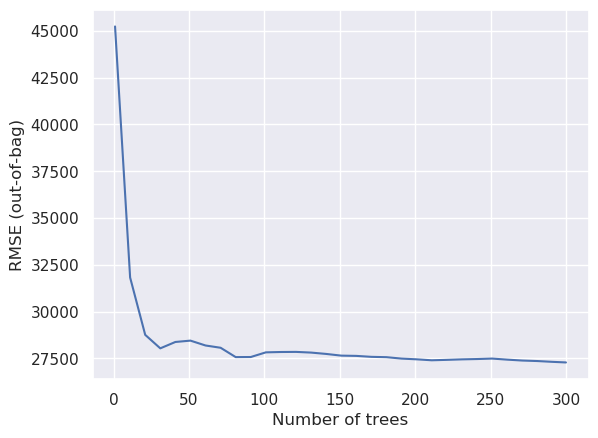

In [61]:
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs],
        [log.evaluation.rmse for log in logs])
plt.xlabel('Number of trees')
plt.ylabel('RMSE (out-of-bag)')
plt.show()

In [62]:
inspector = rf.make_inspector()
inspector.evaluation()

Evaluation(num_examples=1017, accuracy=None, loss=None, rmse=27283.690612785776, ndcg=None, aucs=None, auuc=None, qini=None)

In [63]:
evaluation = rf.evaluate(x=test_ds, return_dict=True)

for name, value in evaluation.items():
    print(f'{name}: {value:.4f}')

1/1 [==============================] - 0s 325ms/step - loss: 0.0000e+00 - mse: 1135914496.0000
loss: 0.0000
mse: 1135914496.0000


In [64]:
variable_importance_metric = "NUM_AS_ROOT"
variable_importances = inspector.variable_importances()[variable_importance_metric]

In [65]:
feature_names = [vi[0].name for vi in variable_importances]
feature_importances = [vi[1] for vi in variable_importances]

In [67]:
feature_ranks = range(len(feature_names))

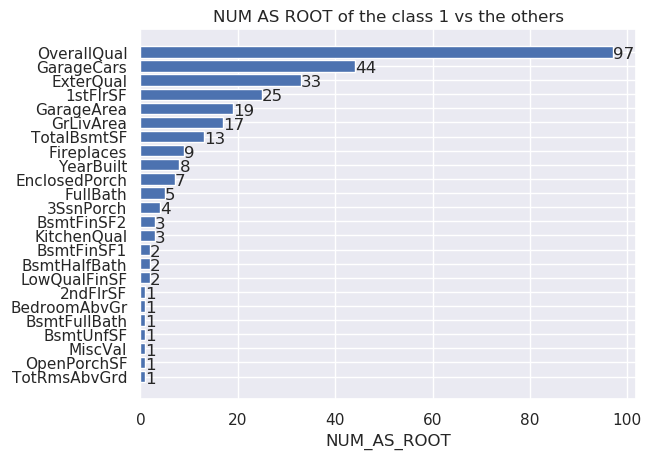

In [68]:
bar = plt.barh(feature_ranks, feature_importances,
               label=[str(x) for x in feature_ranks])
plt.yticks(feature_ranks, feature_names)
plt.gca().invert_yaxis()


for importance, patch in zip(feature_importances, bar.patches):
    plt.text(patch.get_x()+patch.get_width(), patch.get_y(),
            f"{importance:.0f}", va="top")

plt.xlabel(variable_importance_metric)
plt.title("NUM AS ROOT of the class 1 vs the others")
#plt.tight_layout()
plt.show()

In [69]:
test_file_path = 'test.csv'
test_data = pd.read_csv(test_file_path)
ids = test_data.pop('Id')

test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_data, 
                                                task = tfdf.keras.Task.REGRESSION)

preds = rf.predict(test_ds)

output = pd.DataFrame({'Id': ids,
                      'SalePrice': preds.squeeze()})

output.head()

2/2 [==============================] - 0s 30ms/step


,Id,SalePrice
0,1461,125596.906250
1,1462,160392.296875
2,1463,182603.093750
3,1464,188966.859375
4,1465,204042.515625


In [70]:
output.to_csv('output.csv', index=False)